In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ugradio
import astropy.coordinates
import astropy.time
import time
import astropy.io.fits as fits

In [2]:
data_noise_on = []
data_noise_off = []

In [3]:
data_noise_off_example = fits.open('../Data/celestial_pole-noiseoff_' + str(0) + '.fits')

# Noise Off Dictionary

In [4]:
import glob
files_off = glob.glob('../Data/celestial_pole-noiseoff_*.fits')
#files
data_noise_off = {}
for filename in files_off:
    d_off = fits.open(filename)
    header = dict(d_off[0].header)
    d_off_avg = np.mean([d_off[j].data['auto0_real'] for j in range(1,21)], axis=0)
    data_noise_off[(int(header['L']), int(header['B']))] = d_off_avg

In [5]:
#data_noise_off
Ls = list(set([key[0] for key in data_noise_off.keys()]))
Bs = list(set([key[1] for key in data_noise_off.keys()]))
Ls.sort()
Bs.sort()
grid = np.zeros((len(Ls),len(Bs)))
Ls = np.array(Ls)
Bs = np.array(Bs)

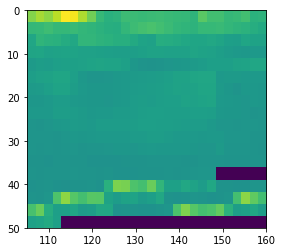

In [6]:
plt.figure()
for (L,B), spec in data_noise_off.items(): #items gives you the keys and the values
    grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists
plt.imshow(grid, extent=[105,160,50,0])

#keep things in dictionaries, for calibrated data, column densities, velocities 

# Noise On Dictionary

In [7]:
data_noise_on = {}
files_on = glob.glob('../Data/celestial_pole-noiseon_*.fits')

for filename in files_on:
    d_on = fits.open(filename)
    header = dict(d_on[0].header)
    d_on_avg = np.mean([d_on[j].data['auto0_real'] for j in range(1,3)], axis=0)
    data_noise_on[(int(header['L']), int(header['B']))] = d_on_avg
    
#data_noise_on
Ls = list(set([key[0] for key in data_noise_on.keys()]))
Bs = list(set([key[1] for key in data_noise_off.keys()]))
Ls.sort()
Bs.sort()
grid = np.zeros((len(Ls),len(Bs)))
Ls = np.array(Ls)
Bs = np.array(Bs)

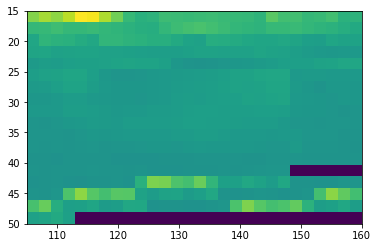

In [8]:
plt.figure()

for (L,B), spec in data_noise_off.items(): #items gives you the keys and the values
    grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists
plt.imshow(grid, extent=[105,160,50,15])

#keep things in dictionaries, for calibrated data, column densities, velocities 

In [9]:
hdr = dict(data_noise_off_example[0].header)
if_freq = 144 + np.arange(0, hdr['NCHAN']) * hdr['RES'] / 1e6
rf_freq = if_freq + 2*635

<IPython.core.display.Javascript object>


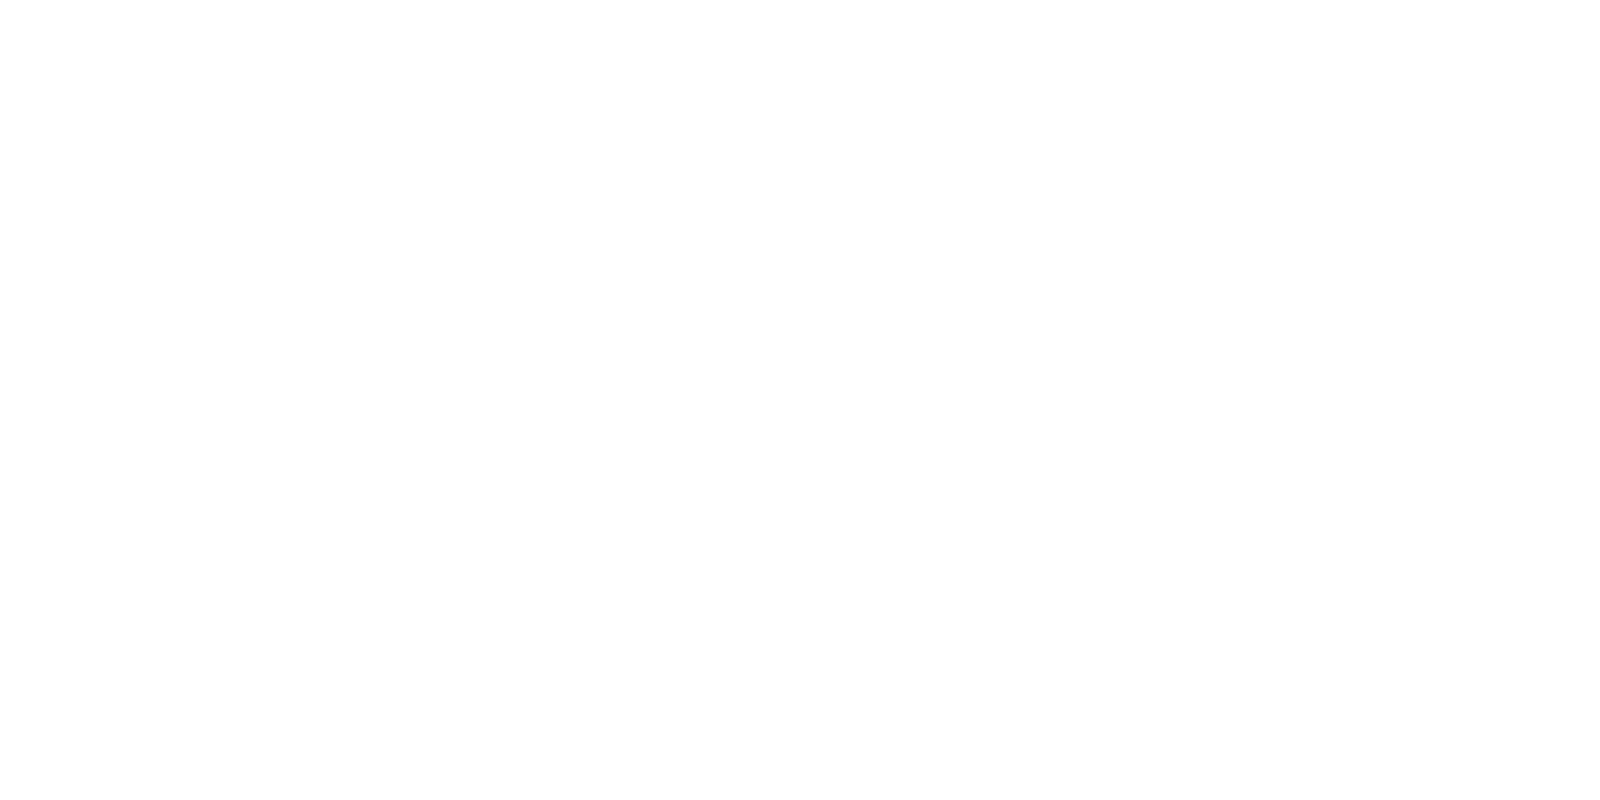

In [47]:
%matplotlib notebook
plt.figure(figsize=(10,5))

for i in data_noise_off:
    
    plt.plot(rf_freq, data_noise_off[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='r', label='HI Line')
plt.title('Noise Off Power Spectra of North Celestial Pole?', fontsize=15)
plt.legend()

#redshifted 

<IPython.core.display.Javascript object>


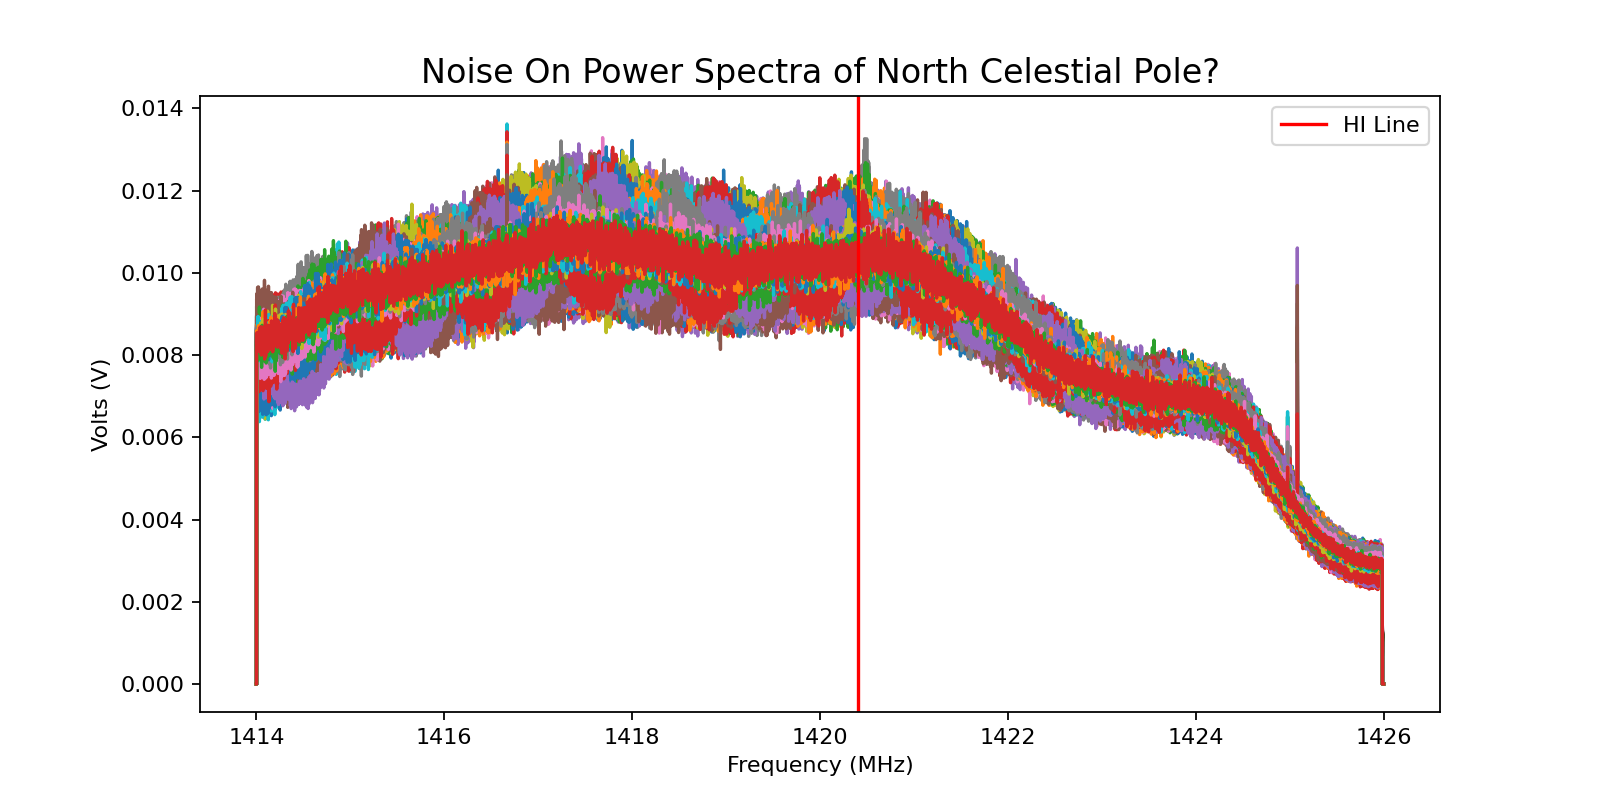

In [46]:
%matplotlib notebook
plt.figure(figsize=(10,5))

for i in data_noise_on:
    
    plt.plot(rf_freq, data_noise_on[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='r', label='HI Line')
plt.title('Noise On Power Spectra of North Celestial Pole?', fontsize=15)
plt.legend()

# Calibration 

In [12]:
import tqdm 

<IPython.core.display.Javascript object>


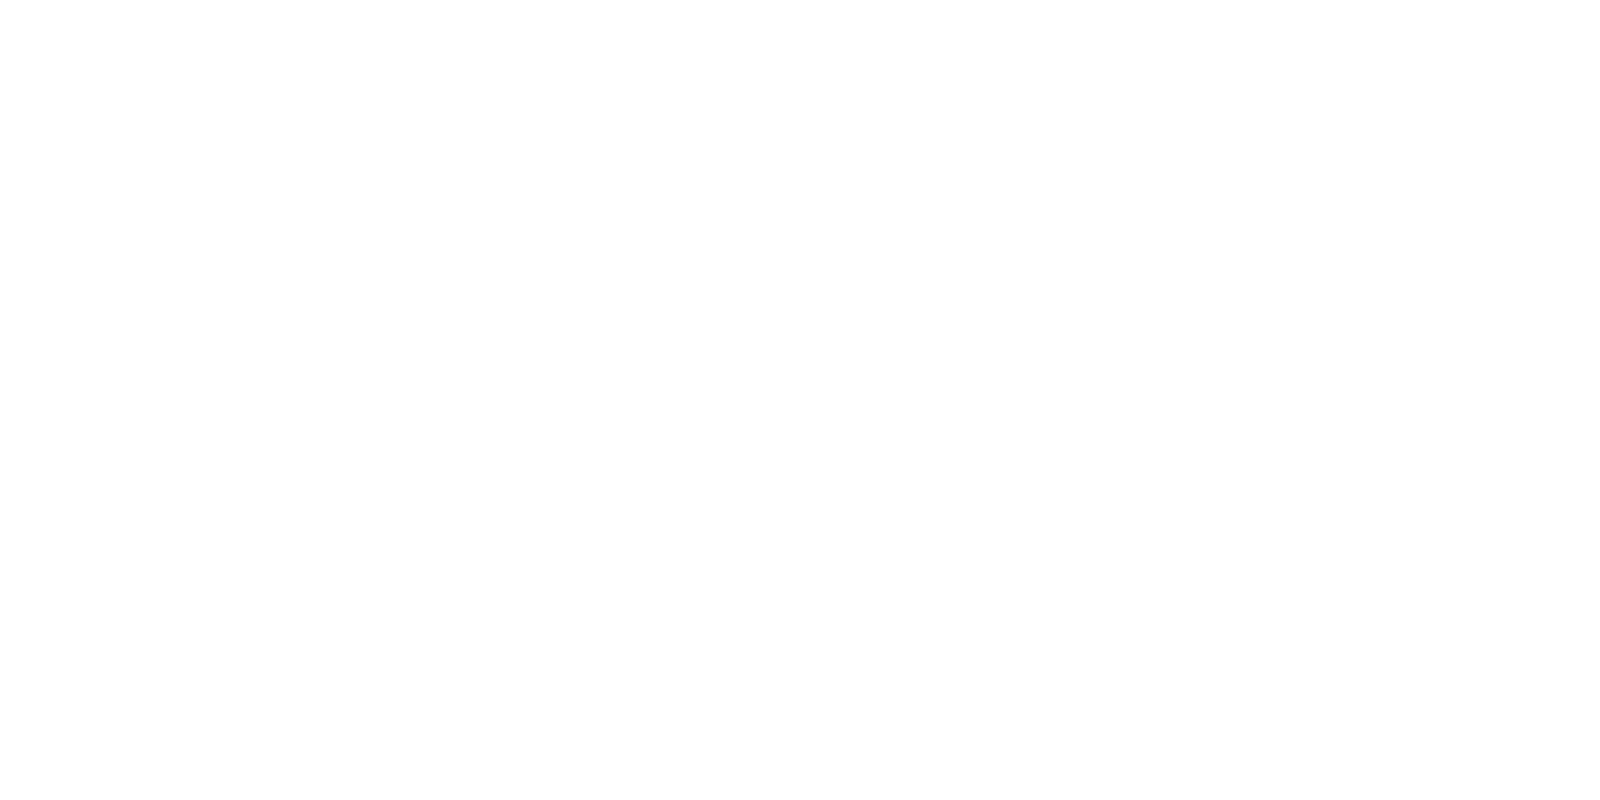

100%|██████████| 474/474 [00:03<00:00, 149.12it/s]


In [13]:
%matplotlib notebook

calibrated_noise_off_spectra = []
t_noise = 90
t_sys = 2.5

plt.figure(figsize=(10,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.axvline(1420.405, color='dodgerblue', label='HI Line')
plt.title('Calibrated Noise Off: Temperature', fontsize=15)

for i in tqdm.tqdm(data_noise_off):
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) #~8000 data points, don't include peak in avg
    
    p = np.polyfit(np.arange(np.array(s_line).shape[0]), s_line, 7)
    
    fit = np.polyval(p, np.arange(np.array(data_noise_off[i]).shape[0]))
    
    plt.plot(rf_freq, g*(s_line - fit), label='ON') #off
    
    calibrated_noise_off_spectra.append(g*(s_line - fit))

<IPython.core.display.Javascript object>


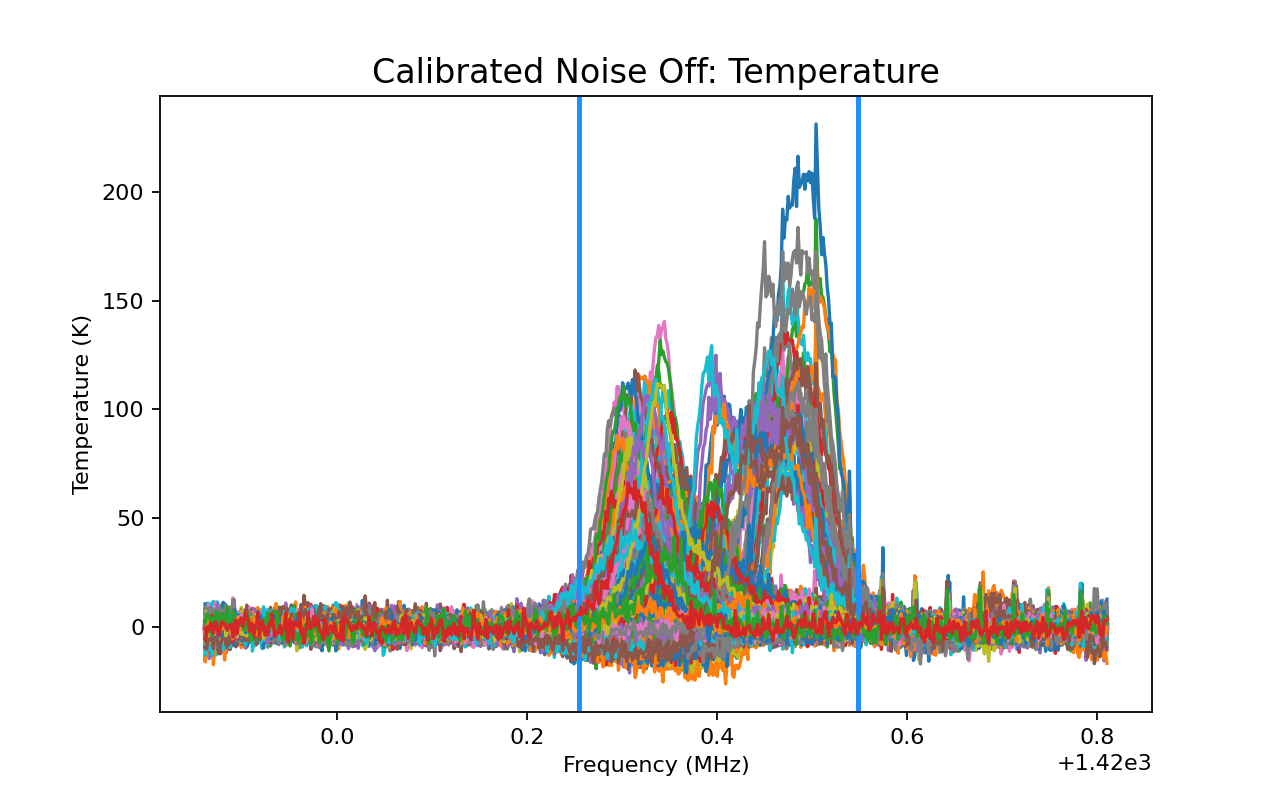

  0%|          | 0/474 [00:00<?, ?it/s]/Users/melrusso/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/melrusso/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
  0%|          | 2/474 [00:00<00:23, 19.73it/s]/Users/melrusso/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/melrusso/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
  1%|          | 4/474 [00:00<00:24, 19.07it/s]/Users/melrusso/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactives

In [48]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.title('Calibrated Noise Off: Temperature', fontsize=15)
calibrated_noise_off_dictionary = {}
calibrated_noise_off_list = []

for i in tqdm.tqdm(data_noise_off):
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) #~8000 data points, don't include peak in avg
    
    #line = np.concatenate(s_line[4000:4270],s_line[4470:5000])
    
    index = np.where((rf_freq > rf_freq[4000]) & (rf_freq < rf_freq[4650]))[0]
    filt_freq = rf_freq[index]
    filt_power = s_line[index]
    ind_left = np.where((rf_freq > rf_freq[4000]) & (rf_freq < rf_freq[4270]))[0] 
    ind_right = np.where((rf_freq > rf_freq[4470]) & (rf_freq < rf_freq[4650]))[0]
    inds = np.hstack([ind_left, ind_right])
    
    p = np.polyfit(rf_freq[inds], s_line[inds], 7)
    
    fit = np.polyval(p, rf_freq[index])
    
    plt.axvline(rf_freq[4270], color='dodgerblue')
    plt.axvline(rf_freq[4470], color='dodgerblue')
    
    plt.plot(rf_freq[index], g*(s_line[index] - fit), label='ON') #off
    
    calibrated_noise_off_dictionary[i] = g*(s_line[index] - fit)
    calibrated_noise_off_list.append(g*(s_line[index] - fit))

In [15]:
# looks good!!

In [16]:
#there is still ripple gain

#get rid by fitting region where the spike is not

#spike will be at different - look at a few spectra and see where spike moves to, how much it changes
#how fast do we expect the area around the north celecstial pole to 
#use that to find out how redshfited/ doppler shifted the object is 

#exclude frequencies -- use cursor to find right and left bounds on frequency on 5 or 10 random files -- break them up
#polyfit exluding peak but include region set around peak
#to make sure our peak is closer to zero

# Next Steps

In [17]:
galactic_1d_grid = []
galactic_latitude_array = np.arange(15, 41, 2)
galactic_longitude_array = np.arange(105, 160, 2)

for lat in galactic_latitude_array:
    for long in galactic_longitude_array:
        galactic_1d_grid.append((lat, long))
        
# get l,b for each spectra
# select 21cm line, and stick power into each grid 
# missing velocity - 
# low freq, mid freq, and high freq grids 

In [18]:
# 2d_array same size as galactic grid
# pick channel that span, sum it all up, get one number

# calibrated_noise_off_spectra
# axis 1 : long, axis 2: lat, axis 3: vel 

In [21]:
# sum up hi line power for each pointing
# finds out how much hydrogen per pointing
# select blue shifted hydrogen
# select red shifted hydrogen 

f_0 = 1420.4e6 #Hz
c = 3e8 #m/s
k = 1.381e-23 #1.381e-16 cgs
nu_0 = 1420.405 #Mhz #hydrogen rest freq
nu = []
c = 3e8 #m/s

power_dict = {}
intensity_dict = {}
column_density_dict = {}
doppler_velocity_dict = {}

for i in calibrated_noise_off_dictionary:
    #spectra already in temperature from calibrated
    #power = np.sum(spectra) #not meaningful, be careful, keep things in temp units. Take an average
    #power = np.mean(spectra[4270 : 4470])# fix this later # do different slices 
    
    spectra = calibrated_noise_off_dictionary[i]
    power = np.mean(spectra)
    power_dict[i] = power

    #spectra_index = list(spectra).index(max(spectra))
    freq = rf_freq[index]*1e6 #[spectra_index]*1e6 #so it's in hertz
    #brightness_temp = spectra[spectra_index]
    intensity = spectra*2*k*freq**2/(c**2)
    
    #intensity = 2*freq**2*(1.381e-23)*brightness_temp/(c**2)# c is in seconds
    intensity_dict[i] = intensity
    
    v = freq*c/(2*f_0) *1e2 # doppler velocity, convert to cm/s
    delta_v = np.median(v[1:]-v[:-1]) #np.diff(v)
    column_density = spectra* delta_v * 1.8e18
    
    column_density_dict[i] = np.sum(column_density)
    
    spectra_index = list(spectra).index(max(spectra))
    new_freq = freq[spectra_index]
    delta_nu = new_freq - nu_0
    vel = delta_nu * c / nu_0
    doppler_velocity_dict[i] = vel

# DICTIONARIES

data_noise_off

data_noise_on

calibrated_noise_off_dictionary

power_dict

intensity_dict

column_density_dict

doppler_velocity_dict

In [34]:
# create grids

power_grid = np.zeros((len(Ls),len(Bs)))
power_grid[:,] = np.nan
intensity_grid = np.zeros((len(Ls),len(Bs)))
intensity_grid[:,] = np.nan
column_density_grid = np.zeros((len(Ls),len(Bs)))
column_density_grid[:,] = np.nan
doppler_velocity_grid = np.zeros((len(Ls),len(Bs)))
doppler_velocity_grid[:,] = np.nan

for (L,B), spec in power_dict.items(): #items gives you the keys and the values
    power_grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec

for (L,B), spec in intensity_dict.items(): #items gives you the keys and the values
    intensity_grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists
    
for (L,B), spec in column_density_dict.items(): #items gives you the keys and the values
    column_density_grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists
    
for (L,B), spec in doppler_velocity_dict.items(): #items gives you the keys and the values
    doppler_velocity_grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists

<IPython.core.display.Javascript object>


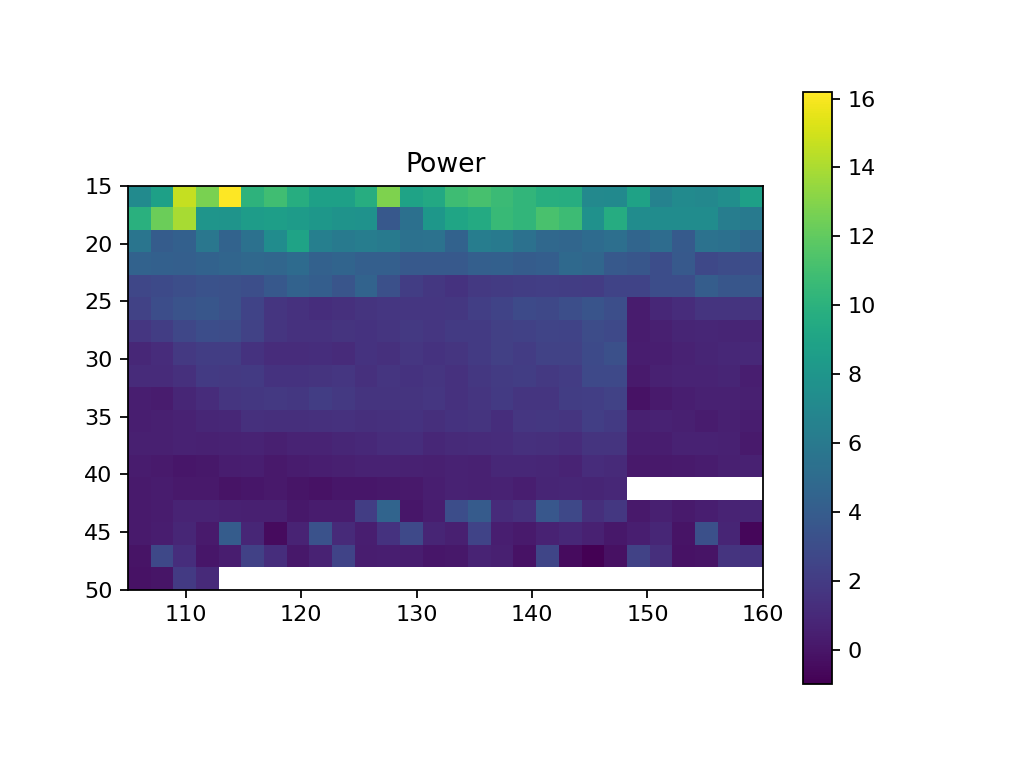

Text(0.5, 1.0, 'Power')

In [36]:
plt.figure()
plt.imshow(power_grid, extent=[105,160,50,15])
plt.colorbar()
plt.title('Power')

<IPython.core.display.Javascript object>


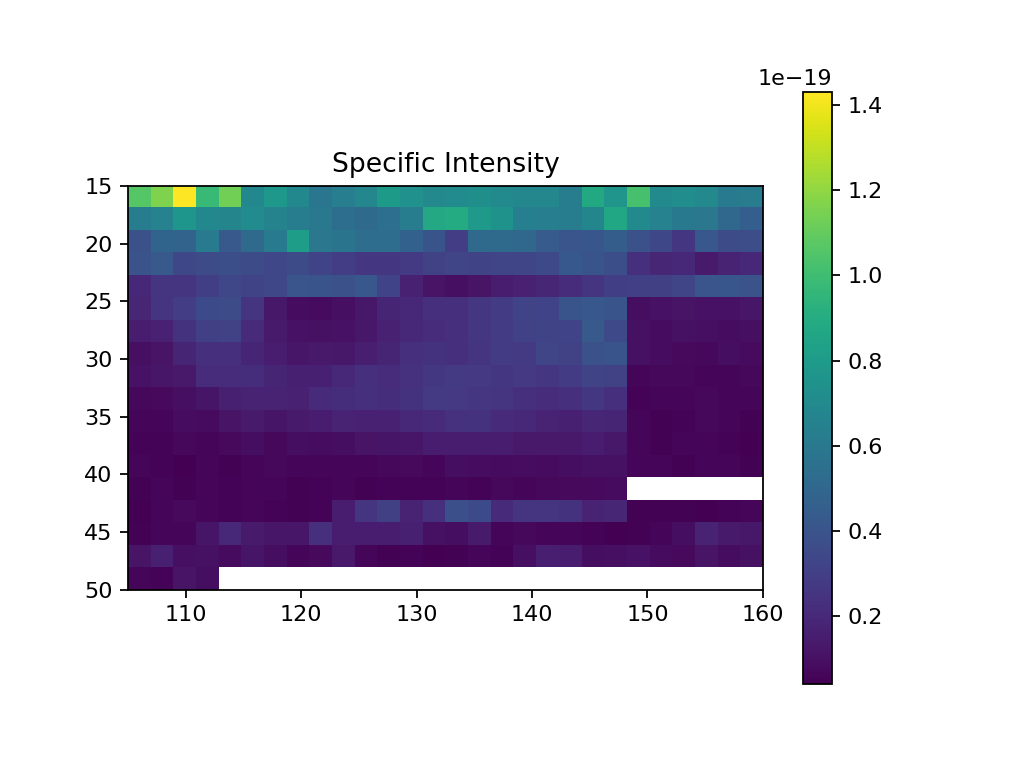

Text(0.5, 1.0, 'Specific Intensity')

In [37]:
plt.figure()
plt.imshow(intensity_grid, extent=[105,160,50,15])
plt.colorbar()
plt.title('Specific Intensity')

<IPython.core.display.Javascript object>


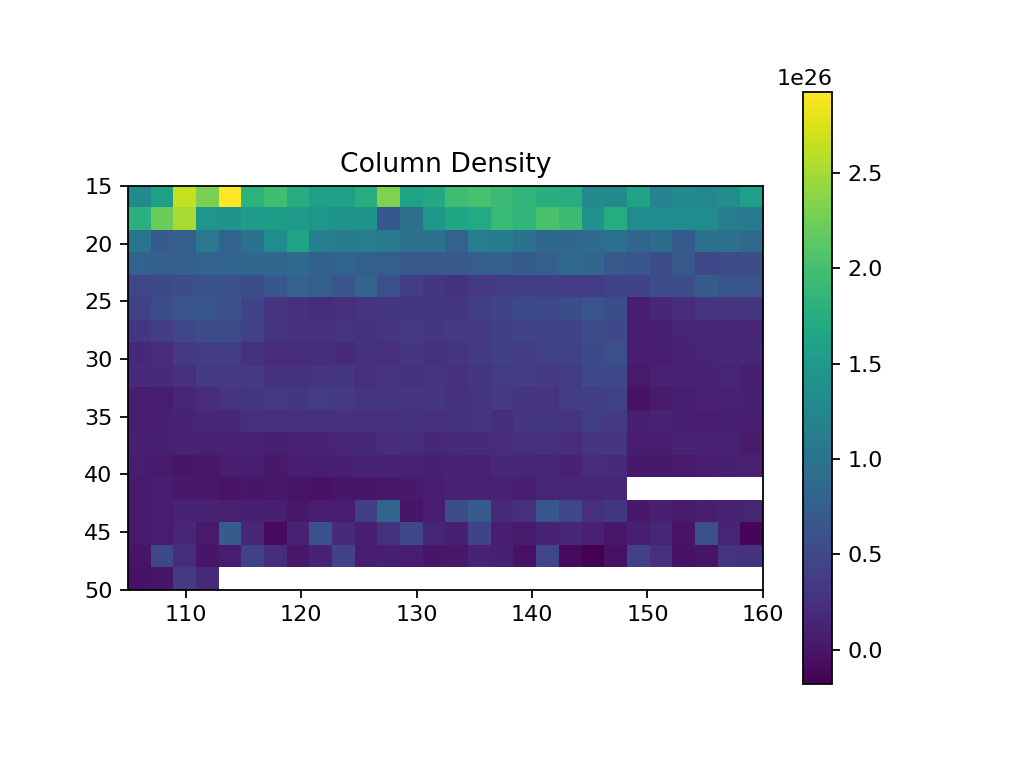

Text(0.5, 1.0, 'Column Density')

In [38]:
plt.figure()
plt.imshow(column_density_grid, extent=[105,160,50,15])
plt.colorbar()
plt.title('Column Density')

<IPython.core.display.Javascript object>


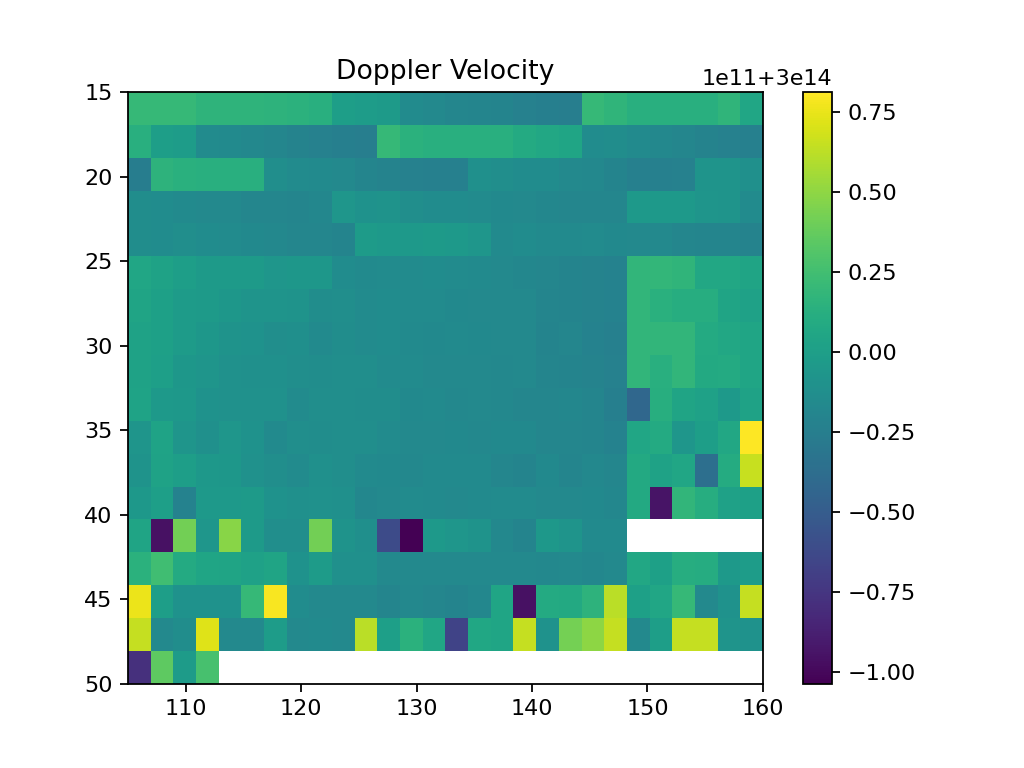

Text(0.5, 1.0, 'Doppler Velocity')

In [39]:
plt.figure()
plt.imshow(doppler_velocity_grid, aspect='auto', extent=[105,160,50,15])
plt.colorbar()
plt.title('Doppler Velocity')
#wait

# Calculate Errors

In [44]:
def gauss(x, amp, std, mean):
    return amp*np.exp(-(x-mean)**2/(std**2)) 
    

In [50]:
from scipy import optimize

array([1414.        , 1414.00146484, 1414.00292969, ..., 1425.99560547,
       1425.99707031, 1425.99853516])

<IPython.core.display.Javascript object>


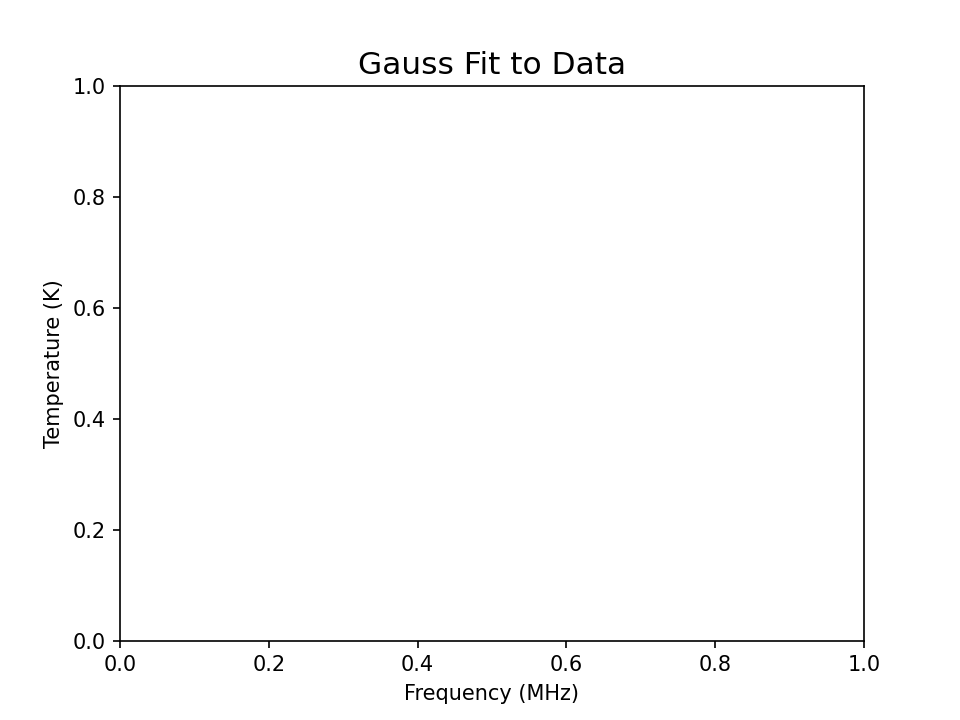

<IPython.core.display.Javascript object>


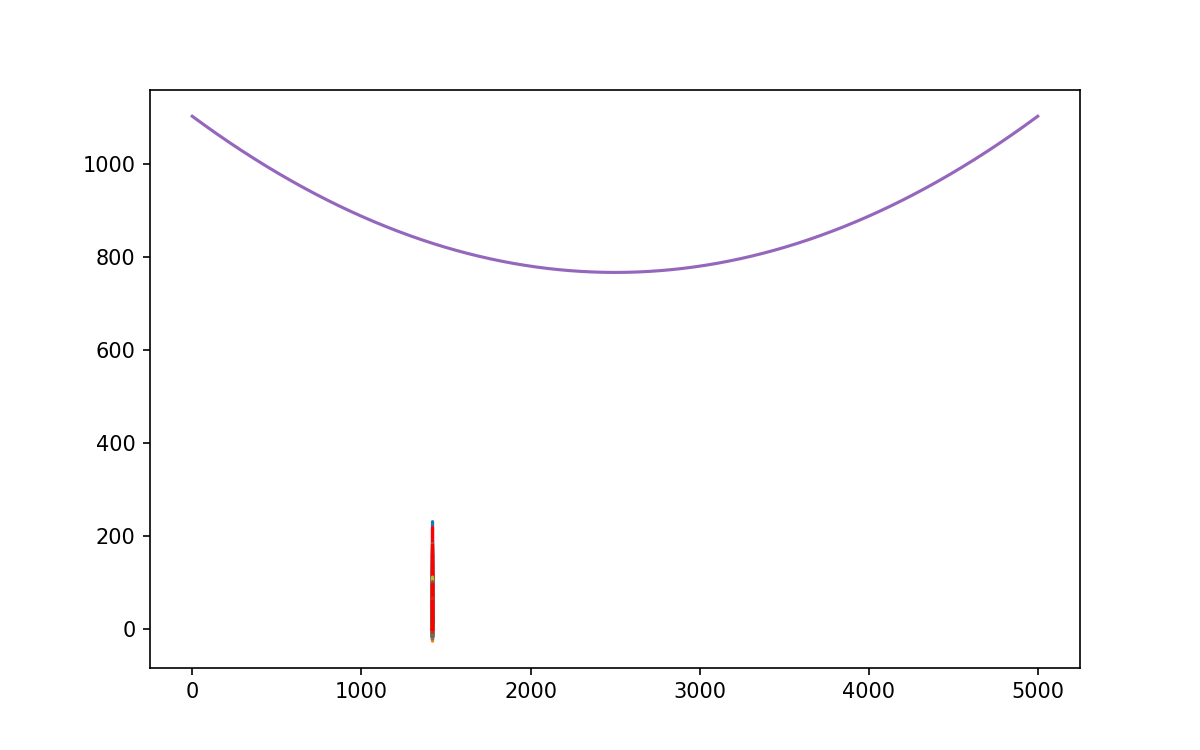

In [97]:
%matplotlib notebook
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.title('Gauss Fit to Data', fontsize=15)
plt.figure(figsize=(8,5))

covariance_matrices = {}
parameters = {}
chisquared = {}
sigmas = {}
freq_cal = rf_freq[4000:4650]

for key in calibrated_noise_off_dictionary:
    
    spectra = calibrated_noise_off_dictionary[key]
    
    index = np.where((rf_freq > rf_freq[4000]) & (rf_freq < rf_freq[4650]))[0]
    
    amp2 = np.max(spectra)
    avg2 = 1420.4 #freq_cal[list(spectra).index(np.max(spectra))]
    sig2 = rf_freq[4470]-rf_freq[4270]
    d = {'amp' : amp2, 'avg':avg2, 'sig': sig2}
    p0 = [amp2, sig2, avg2]
    
    # we need to make sure that these are teh same length- spectra and rf_freq[index]
    
    #gauss_fit = np.polyfit(rf_freq[index][274:470], spectra, 2) 
    #gauss_val = np.polyval(gauss_fit, rf_freq[index][274:470])
    
    gauss_fit, covariance_matrix = optimize.curve_fit(gauss, rf_freq[index], spectra, p0=p0, bounds=[[0, 0, 1420.1],[300, 300, 1420.6]]) 
    parameters[key] = gauss_fit
    
    covariance_matrices[key] = (covariance_matrix)
    gauss_val = gauss(rf_freq[index], *gauss_fit)
    
    sigma = np.std(spectra[0:100])
    
    sigmas[key] = sigma
    chisquared[key] = chisq(spectra, gauss_val, sigma)
    
    #plt.axvline(rf_freq[4270], color='dodgerblue')
    #plt.axvline(rf_freq[4470], color='dodgerblue')
    
    #plt.plot(rf_freq[index][274:470], spectra, label='Data')
    plt.plot(rf_freq[index], spectra, label='Data')
    plt.plot(rf_freq[index], gauss_val, 'r', label='Fit')

In [98]:
def chisq(ys, mdl, sig):
    return np.sum(np.abs(ys-mdl)**2/sig**2)

In [101]:
parameters.values()

{(33, 139): array([3.33995796e+01, 3.08501436e-02, 1.42032091e+03]),
 (35, 117): array([1.61559539e+01, 4.29707858e-02, 1.42035904e+03]),
 (45, 123): array([1.84240005e+01, 2.54393582e-02, 1.42033062e+03]),
 (25, 105): array([2.34940925e+01, 5.83199473e-02, 1.42044135e+03]),
 (47, 149): array([1.12248048e+01, 1.32032914e-01, 1.42036149e+03]),
 (23, 115): array([4.45173451e+01, 3.54595597e-02, 1.42032487e+03]),
 (17, 147): array([1.21690710e+02, 3.50267458e-02, 1.42034339e+03]),
 (31, 113): array([3.02132170e+01, 3.17520482e-02, 1.42036934e+03]),
 (41, 141): array([6.36856015e+00, 6.80659463e-02, 1.42033691e+03]),
 (15, 119): array([1.03158496e+02, 5.84443931e-02, 1.42046143e+03]),
 (21, 139): array([4.66108799e+01, 4.22023292e-02, 1.42032441e+03]),
 (35, 125): array([2.23143383e+01, 3.10839464e-02, 1.42034262e+03]),
 (45, 135): array([1.67683050e+01, 7.91838339e-02, 1.42031853e+03]),
 (25, 137): array([4.18156817e+01, 2.86090079e-02, 1.42032824e+03]),
 (39, 115): array([5.62150176e+00,

In [124]:
amp_winners = {}
std_winners = {}
mean_winners = {}


for p in parameters:
    
    spectra = calibrated_noise_off_dictionary[p]
    
    amp_chisq = []
    std_chisq = []
    mean_chisq = []
    
    amp, std, mean = parameters[p]
    amps = np.linspace(amp-8, amp+8, 5000)
    stds = np.linspace(std-.5, std+.5, 5000)
    means = np.linspace(mean-.5, mean+.5, 5000)

    for amp_1 in amps:
        amp_chisq.append(chisq(spectra, gauss(rf_freq[index], amp_1, std, mean), sigmas[p]))
        
    for std_1 in stds:
        std_chisq.append(chisq(spectra, gauss(rf_freq[index], amp, std_1, mean), sigmas[p]))
        
    for mean_1 in means:
        mean_chisq.append(chisq(spectra, gauss(rf_freq[index], amp, std, mean_1), sigmas[p]))
        
    amp_chisq = np.array(amp_chisq)
    amp_winner = amps[np.argmin(np.abs(amp_chisq - chisquared[p] - 1))] - amp
    amp_winners[p] = abs(amp_winner)
    
    std_chisq = np.array(std_chisq)
    std_winner = stds[np.argmin(np.abs(std_chisq - chisquared[p] - 1))] - std
    std_winners[p] = abs(std_winner)
    
    mean_chisq = np.array(mean_chisq)
    mean_winner = means[np.argmin(np.abs(mean_chisq - chisquared[p] - 1))] - mean
    mean_winners[p] = abs(mean_winner)

KeyboardInterrupt: 

In [125]:
mean_winners # resolution

{(33, 139): 0.0005001000199627015,
 (35, 117): 0.0011002200440088927,
 (45, 123): 0.0007001400279023073,
 (25, 105): 0.0009001800360692869,
 (47, 149): 0.004100820164012475,
 (23, 115): 0.0003000600120230956,
 (17, 147): 0.00010002000408348977}

In [126]:
std_winners

{(33, 139): 0.0005001000200039914,
 (35, 117): 0.001300260052010456,
 (45, 123): 0.04990998199639926,
 (25, 105): 0.0011002200440087678,
 (47, 149): 0.2685537107421484,
 (23, 115): 0.07131426285257056,
 (17, 147): 0.0699139827965593}

In [127]:
amp_winners

{(33, 139): 0.45289057811562117,
 (35, 117): 0.3984796959391872,
 (45, 123): 0.5745149029805958,
 (25, 105): 0.3664732946589311,
 (47, 149): 0.350470094018803,
 (23, 115): 0.38247649529905914,
 (17, 147): 0.5393078615723255}

In [135]:
overall_amp_uncertainty = (1/(np.sum(1/np.array(list(amp_winners.values()))**2)))**(.5)
overall_avg_uncertainty = (1/(np.sum(1/np.array(list(mean_winners.values()))**2)))**(.5)
overall_std_uncertainty = (1/(np.sum(1/np.array(list(std_winners.values()))**2)))**(.5)

In [136]:
overall_amp_uncertainty #propagate 

0.15798728301823034

In [137]:
overall_avg_uncertainty

9.158341510076722e-05

In [138]:
overall_std_uncertainty

0.0004296631710004958

<IPython.core.display.Javascript object>


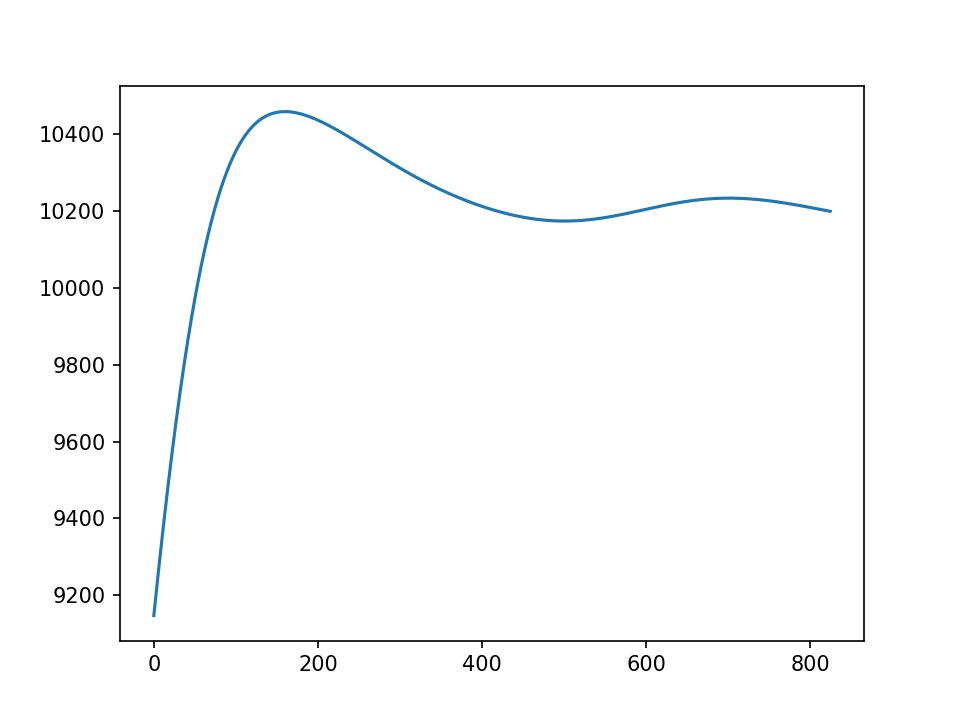

In [134]:
%matplotlib notebook
plt.figure()
plt.plot(np.array(list(mean_chisq)))

In [88]:
amperr = {}
avgerr = {}
sigerr = {}
for key in tqdm.tqdm(covariance_matrices):
    #spectra = calibrated_noise_off_spectra[i]
    i = covariance_matrices[key]
    amp_error = ((np.diag(i)[0])**0.5)
    avg_error = ((np.diag(i)[2])**0.5)
    sig_error = ((np.diag(i)[1])**0.5)
    
    amperr[key] = amp_error
    avgerr[key] = avg_error
    sigerr[key] = sig_error

100%|██████████| 474/474 [00:00<00:00, 36484.26it/s]


In [89]:
# can make a map of error values
# report as single values

# sigma^2 = 1/sum(1/ind_sigma^2)

overall_amp_uncertainty = (1/(np.sum(1/np.array(list(amperr.values()))**2)))**(.5)
overall_avg_uncertainty = (1/(np.sum(1/np.array(list(avgerr.values()))**2)))**(.5)
overall_std_uncertainty = (1/(np.sum(1/np.array(list(sigerr.values()))**2)))**(.5)

In [92]:
overall_avg_uncertainty

6.860120814066577e-06